# Duplicated exterior vertecies

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import os
os.getcwd()

'/Users/lukaszkielar/Python/geopandas/geopandas/tools/tests/notebooks'

In [ ]:
from geopandas.tools.topology import _return_affected_geoms, _exterior_duplicates_bool, exterior_duplicates

## Get the data

### GeoJSON

In [3]:
path = "../data/exterior/exterior_test_data.geojson"
gdf = gpd.read_file(path)

In [4]:
gdf

,descr,geometry
0,geom1 no dupl,"POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0))"
1,geom1 1 dupl,"POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0))"
2,geom1 2 dupl,"POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0))"
3,geom1 int no dupl,"POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2,..."
4,geom1 int 1 dupl,"POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0), (1 1,..."
5,geom1 int 2 dupl,"POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0), ..."
6,geom2 no dupl,"POLYGON ((5 0, 5 3, 8 3, 8 0, 5 0))"
7,geom2 1 dupl,"POLYGON ((5 0, 5 3, 8 3, 8 0, 8 0, 5 0))"
8,geom2 2 dupl,"POLYGON ((5 0, 5 3, 8 3, 8 3, 8 0, 8 0, 5 0))"
9,geom2 int no dupl,"POLYGON ((5 0, 5 3, 8 3, 8 0, 5 0), (6 1, 6 2,..."


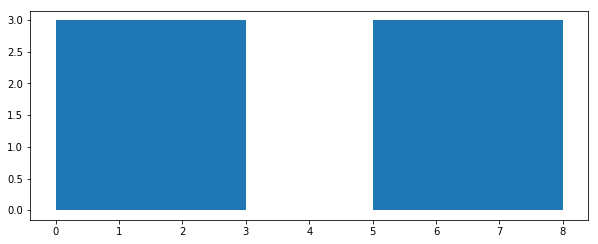

In [5]:
gdf.plot(figsize=(10,10))

In [8]:
geoseries = gdf.geometry
geoseries

0                   POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0))
1              POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0))
2         POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0))
3     POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2,...
4     POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0), (1 1,...
5     POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0), ...
6                   POLYGON ((5 0, 5 3, 8 3, 8 0, 5 0))
7              POLYGON ((5 0, 5 3, 8 3, 8 0, 8 0, 5 0))
8         POLYGON ((5 0, 5 3, 8 3, 8 3, 8 0, 8 0, 5 0))
9     POLYGON ((5 0, 5 3, 8 3, 8 0, 5 0), (6 1, 6 2,...
10    POLYGON ((5 0, 5 3, 8 3, 8 0, 8 0, 5 0), (6 1,...
11    POLYGON ((5 0, 5 3, 8 3, 8 3, 8 0, 8 0, 5 0), ...
12    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ...
13    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0)), POL...
14    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ...
15    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0), (1 1...
16    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2...
17    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0)),

In [9]:
new_geoseries = _return_affected_geoms(geoseries, func=_exterior_duplicates_bool)
new_geoseries

1              POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0))
2         POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0))
4     POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0), (1 1,...
5     POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0), ...
7              POLYGON ((5 0, 5 3, 8 3, 8 0, 8 0, 5 0))
8         POLYGON ((5 0, 5 3, 8 3, 8 3, 8 0, 8 0, 5 0))
10    POLYGON ((5 0, 5 3, 8 3, 8 0, 8 0, 5 0), (6 1,...
11    POLYGON ((5 0, 5 3, 8 3, 8 3, 8 0, 8 0, 5 0), ...
13    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0)), POL...
14    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ...
15    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0), (1 1...
16    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2...
17    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0)), POL...
18    (POLYGON ((0 0, 0 3, 3 3, 3 0, 3 0, 0 0), (1 1...
20    (POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0))...
21    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ...
22    (POLYGON ((0 0, 0 3, 3 3, 3 3, 3 0, 3 0, 0 0),...
23    (POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1,

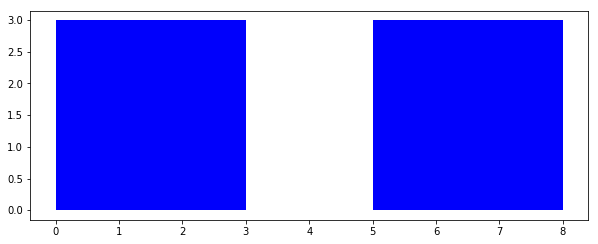

In [10]:
ax = geoseries.plot(figsize=(10,10), color='red', alpha=0.3)
new_geoseries.plot(ax=ax, color='blue', alpha=0.3)

In [15]:
final_geoseries = exterior_duplicates(geoseries)

In [16]:
final_geoseries

1                                         (POINT (3 0))
2                            (POINT (3 0), POINT (3 3))
4                                         (POINT (3 0))
5                            (POINT (3 0), POINT (3 3))
7                                         (POINT (8 0))
8                            (POINT (8 3), POINT (8 0))
10                                        (POINT (8 0))
11                           (POINT (8 3), POINT (8 0))
13                                        (POINT (3 0))
14                                        (POINT (8 0))
15                                        (POINT (3 0))
16                                        (POINT (8 0))
17                           (POINT (3 0), POINT (8 0))
18                           (POINT (3 0), POINT (8 0))
20                           (POINT (3 0), POINT (3 3))
21                           (POINT (8 3), POINT (8 0))
22                           (POINT (3 0), POINT (3 3))
23                           (POINT (8 3), POINT

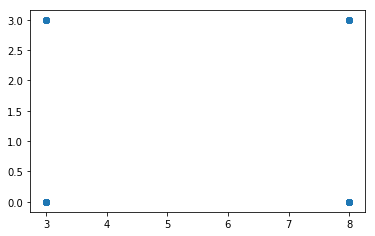

In [17]:
final_geoseries.plot()

### SHP

In [28]:
path = "../data/shp/duplicated_exterior_vertices.shp"
path2 = "../data/shp/duplicated_exterior_vertices_multipart.shp"
gdf = gpd.read_file(path2)

In [29]:
gdf

,id,geometry
0,1,"POLYGON ((151 -285, 352 -279, 352 -279, 364 -3..."
1,10,(POLYGON ((-43.99851510731804 50.9361132418613...
2,2,POLYGON ((435.8477564102565 -284.7503205128205...
3,3,POLYGON ((241.8759615384615 -29.32211538461519...
4,4,"POLYGON ((483.860576923077 -29.32211538461519,..."
5,5,POLYGON ((297.5708333333333 -159.9169871794871...
6,6,POLYGON ((201.7852564102556 -155.5958333333346...
7,7,(POLYGON ((663.3976574654281 -128.552467858686...
8,8,(POLYGON ((248.9901981597521 109.0059483038032...
9,9,(POLYGON ((183.0017492257273 -413.622567253673...


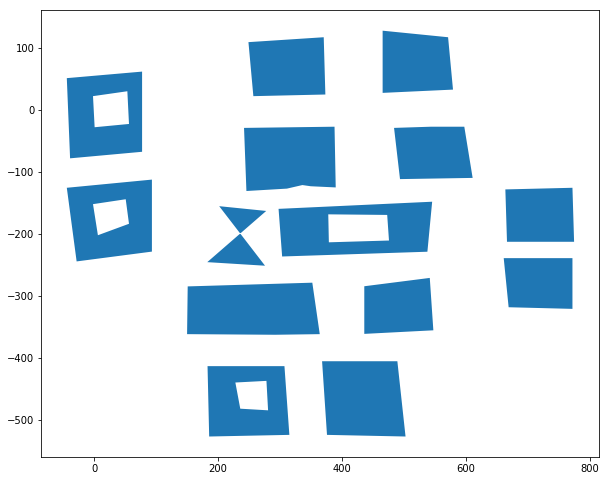

In [30]:
gdf.plot(figsize=(10,10))

In [31]:
geoseries = gdf.geometry
geoseries

0    POLYGON ((151 -285, 352 -279, 352 -279, 364 -3...
1    (POLYGON ((-43.99851510731804 50.9361132418613...
2    POLYGON ((435.8477564102565 -284.7503205128205...
3    POLYGON ((241.8759615384615 -29.32211538461519...
4    POLYGON ((483.860576923077 -29.32211538461519,...
5    POLYGON ((297.5708333333333 -159.9169871794871...
6    POLYGON ((201.7852564102556 -155.5958333333346...
7    (POLYGON ((663.3976574654281 -128.552467858686...
8    (POLYGON ((248.9901981597521 109.0059483038032...
9    (POLYGON ((183.0017492257273 -413.622567253673...
Name: geometry, dtype: object

In [32]:
final_geoseries = exterior_duplicates(geoseries)
final_geoseries

0                 (POINT (352 -279), POINT (364 -362))
1    (POINT (77.42023093128762 61.49426507130534), ...
2       (POINT (547.2375000000002 -355.8092948717949))
3       (POINT (349.4246794871795 -123.4272435897435))
4       (POINT (543.3964743589745 -27.40160256410235))
7       (POINT (774.2582516745898 -213.0176824942379))
8    (POINT (373.0484821557188 24.54073366825145), ...
9         (POINT (314.978647093777 -524.483161462835))
Name: geometry, dtype: object

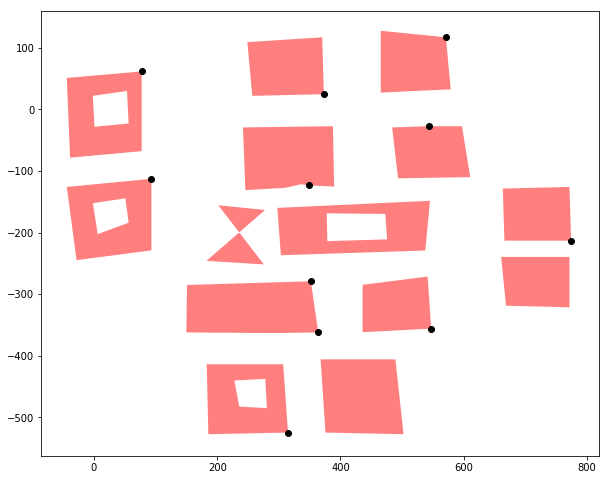

In [33]:
ax = geoseries.plot(figsize=(10,10), color='red', alpha=0.5)
final_geoseries.plot(ax=ax, color='black', marker='o')